In [1]:
import os
import pandas as pd
import numpy as np
import anndata
import time
import matplotlib.pyplot as plt
import json
import requests

In [2]:
version = '20231030'
download_base = '../../abc_download_root'

use_local_cache = True
manifest_path = 'releases/%s/manifest.json' % version

if not use_local_cache :
    url = 'https://allen-brain-cell-atlas.s3-us-west-2.amazonaws.com/' + manifest_path
    manifest = json.loads(requests.get(url).text)
else :
    file = os.path.join(download_base,manifest_path)
    with open(file,'rb') as f:
        manifest = json.load(f)
    
metadata = manifest['file_listing']['SEAAD-10X']['metadata']

In [3]:
view_directory = os.path.join( download_base, 
                               manifest['directory_listing']['SEAAD-10X']['directories']['metadata']['relative_path'], 
                              'views')
cache_views = True
if cache_views :
    os.makedirs( view_directory, exist_ok=True )

In [4]:
rpath = metadata['cell_metadata']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cell = pd.read_csv(file, dtype={'cell_label':str})
cell.set_index('cell_label',inplace=True)
print("Number of cells = ", len(cell))
cell.head(5)

Number of cells =  2773812


,cell_barcode,feature_matrix_label,region_of_interest_acronym,library_label,barcoded_cell_sample_label,library_method,entity,donor_label,cluster_alias,class_confidence,subclass_confidence,supertype_confidence,x,y
cell_label,,,,,,,,,,,,,,
GGTGATTAGGTCACTT-L8TX_210722_01_H06-1153814299,GGTGATTAGGTCACTT,SEAAD-10X-MTG,MTG,L8TX_210722_01_H06,733_B01,10Xv3.1,Nuclei,H20.33.034,Oligo_4,1.0,1.0,1.000000,6.776383,15.817554
TTGAACGCAGGTGTGA-L8TX_210729_01_G12-1153814338,TTGAACGCAGGTGTGA,SEAAD-10X-MTG,MTG,L8TX_210729_01_G12,740_H05,10Xv3.1,Nuclei,H21.33.035,L5 IT_5,1.0,1.0,1.000000,-3.965899,-4.950754
GGGAGTAAGGCATTTC-L8TX_210107_01_H09-1142430361,GGGAGTAAGGCATTTC,SEAAD-10X-MTG,MTG,L8TX_210107_01_H09,481_B05,10Xv3.1,Nuclei,H20.33.014,L2/3 IT_5,1.0,1.0,0.985886,6.735039,-6.604597
ACAGAAAGTATCGTGT-L8TX_210415_01_G01-1153814188,ACAGAAAGTATCGTGT,SEAAD-10X-MTG,MTG,L8TX_210415_01_G01,608_C04,10Xv3.1,Nuclei,H21.33.015,L5/6 NP_6,1.0,1.0,0.997137,-17.506380,12.402401
TTGTTCAAGCGAGAAA-L8TX_210513_01_F11-1153814259,TTGTTCAAGCGAGAAA,SEAAD-10X-MTG,MTG,L8TX_210513_01_F11,562_D06,10Xv3.1,Nuclei,H20.33.033,Oligo_4,1.0,1.0,1.000000,8.087040,17.595337


In [5]:
def print_column_info(df) :
    
    for c in df.columns :
        grouped = df[[c]].groupby(c).count()
        members = ''
        if len(grouped) < 30 :
            members = str(list(grouped.index))
        print("Number of unique %s = %d %s" % (c,len(grouped),members))
        

In [6]:
print_column_info(cell)

Number of unique cell_barcode = 2036321 
Number of unique feature_matrix_label = 2 ['SEAAD-10X-DLPFC', 'SEAAD-10X-MTG']
Number of unique region_of_interest_acronym = 2 ['DLPFC', 'MTG']
Number of unique library_label = 431 
Number of unique barcoded_cell_sample_label = 415 
Number of unique library_method = 3 ['10Xv3', '10Xv3.1', '10xMulti']
Number of unique entity = 1 ['Nuclei']
Number of unique donor_label = 89 
Number of unique cluster_alias = 139 
Number of unique class_confidence = 1806 
Number of unique subclass_confidence = 35590 
Number of unique supertype_confidence = 257282 
Number of unique x = 2575617 
Number of unique y = 2595816 


In [7]:
rpath = metadata['donor_metadata']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
donor = pd.read_csv(file)
donor.set_index('donor_label',inplace=True)
color_cols = [x for x in donor.columns if 'color' in x ]
donor[color_cols] = donor[color_cols].fillna(value='#f9f9f9')
donor

,donor_sex,donor_gender,age_at_death,pseudo_progression_score,years_of_education,apoe4_status,cognitive_status,thal_phase,braak_stage,cerad_score,...,braak_stage_order,braak_stage_color,cerad_score_order,cerad_score_color,lewy_body_disease_pathology_order,lewy_body_disease_pathology_color,total_microinfarcts_range_order,total_microinfarcts_range_color,pseudo_progression_score_range_order,pseudo_progression_score_range_color
donor_label,,,,,,,,,,,,,,,,,,,,,
H18.30.001,Female,Female,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,#f9f9f9,NaN,#f9f9f9,NaN,#f9f9f9,NaN,#f9f9f9,NaN,#f9f9f9
H18.30.002,Male,Male,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,#f9f9f9,NaN,#f9f9f9,NaN,#f9f9f9,NaN,#f9f9f9,NaN,#f9f9f9
H19.30.001,Male,Male,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,#f9f9f9,NaN,#f9f9f9,NaN,#f9f9f9,NaN,#f9f9f9,NaN,#f9f9f9
H19.30.002,Male,Male,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,#f9f9f9,NaN,#f9f9f9,NaN,#f9f9f9,NaN,#f9f9f9,NaN,#f9f9f9
H19.33.004,Female,Female,80,0.302313,17.0,N,No dementia,Thal 0,Braak IV,Absent,...,3.0,#4ac16d,0.0,#2a788e,0.0,#3b528b,0.0,#440154,1.0,#31688e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H21.33.043,Female,Female,90+,0.520347,16.0,N,Dementia,Thal 4,Braak II,Sparse,...,1.0,#277f8e,1.0,#22a884,1.0,#2c728e,0.0,#440154,2.0,#35b779
H21.33.044,Female,Female,88,0.844798,15.0,N,Dementia,Thal 3,Braak VI,Frequent,...,5.0,#fde725,3.0,#fde725,0.0,#3b528b,2.0,#fde725,3.0,#fde725
H21.33.045,Female,Female,90+,0.924065,12.0,Y,Dementia,Thal 4,Braak VI,Frequent,...,5.0,#fde725,3.0,#fde725,5.0,#addc30,0.0,#440154,3.0,#fde725


In [8]:
color_cols

['donor_label_color',
 'age_at_death_range_color',
 'donor_sex_color',
 'donor_gender_color',
 'years_of_education_range_color',
 'apoe4_status_color',
 'cognitive_status_color',
 'thal_phase_color',
 'braak_stage_color',
 'cerad_score_color',
 'lewy_body_disease_pathology_color',
 'total_microinfarcts_range_color',
 'pseudo_progression_score_range_color']

In [9]:
taxonomy_metadata = manifest['file_listing']['SEAAD-taxonomy']['metadata']

In [10]:
rpath = taxonomy_metadata['cluster_to_cluster_annotation_membership_pivoted']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cluster_details = pd.read_csv(file,keep_default_na=False)
cluster_details.set_index('cluster_alias', inplace=True)
cluster_details.head(5)

,abundancechangecps,class,subclass,supertype
cluster_alias,,,,
Astro_1,unchanged,Non-neuronal and Non-neural,Astrocyte,Astro_1
Astro_2,increase,Non-neuronal and Non-neural,Astrocyte,Astro_2
Astro_3,unchanged,Non-neuronal and Non-neural,Astrocyte,Astro_3
Astro_4,unchanged,Non-neuronal and Non-neural,Astrocyte,Astro_4
Astro_5,unchanged,Non-neuronal and Non-neural,Astrocyte,Astro_5


In [11]:
rpath = taxonomy_metadata['cluster_to_cluster_annotation_membership_color']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cluster_colors = pd.read_csv(file)
cluster_colors.set_index('cluster_alias', inplace=True)
cluster_colors.head(5)

,abundancechangecps_color,class_color,subclass_color,supertype_color
cluster_alias,,,,
Astro_1,#F7F7F7,#808080,#665C47,#D1C9BA
Astro_2,#B2182B,#808080,#665C47,#AAA395
Astro_3,#F7F7F7,#808080,#665C47,#847D71
Astro_4,#F7F7F7,#808080,#665C47,#5E574C
Astro_5,#F7F7F7,#808080,#665C47,#383228


In [12]:
cell_extended = cell.join(donor,on='donor_label')
cell_extended = cell_extended.join(cluster_details,on='cluster_alias')
cell_extended = cell_extended.join(cluster_colors,on='cluster_alias')
cell_extended.head(5)

,cell_barcode,feature_matrix_label,region_of_interest_acronym,library_label,barcoded_cell_sample_label,library_method,entity,donor_label,cluster_alias,class_confidence,...,pseudo_progression_score_range_order,pseudo_progression_score_range_color,abundancechangecps,class,subclass,supertype,abundancechangecps_color,class_color,subclass_color,supertype_color
cell_label,,,,,,,,,,,,,,,,,,,,,
GGTGATTAGGTCACTT-L8TX_210722_01_H06-1153814299,GGTGATTAGGTCACTT,SEAAD-10X-MTG,MTG,L8TX_210722_01_H06,733_B01,10Xv3.1,Nuclei,H20.33.034,Oligo_4,1.0,...,1.0,#31688e,unchanged,Non-neuronal and Non-neural,Oligodendrocyte,Oligo_4,#F7F7F7,#808080,#53776C,#32443D
TTGAACGCAGGTGTGA-L8TX_210729_01_G12-1153814338,TTGAACGCAGGTGTGA,SEAAD-10X-MTG,MTG,L8TX_210729_01_G12,740_H05,10Xv3.1,Nuclei,H21.33.035,L5 IT_5,1.0,...,1.0,#31688e,unchanged,Neuronal: Glutamatergic,L5 IT,L5 IT_5,#F7F7F7,#00ADF8,#50B2AD,#547B79
GGGAGTAAGGCATTTC-L8TX_210107_01_H09-1142430361,GGGAGTAAGGCATTTC,SEAAD-10X-MTG,MTG,L8TX_210107_01_H09,481_B05,10Xv3.1,Nuclei,H20.33.014,L2/3 IT_5,1.0,...,2.0,#35b779,decrease,Neuronal: Glutamatergic,L2/3 IT,L2/3 IT_5,#2166AC,#00ADF8,#B1EC30,#BAC86A
ACAGAAAGTATCGTGT-L8TX_210415_01_G01-1153814188,ACAGAAAGTATCGTGT,SEAAD-10X-MTG,MTG,L8TX_210415_01_G01,608_C04,10Xv3.1,Nuclei,H21.33.015,L5/6 NP_6,1.0,...,0.0,#440154,unchanged,Neuronal: Glutamatergic,L5/6 NP,L5/6 NP_6,#F7F7F7,#00ADF8,#3E9E64,#225637
TTGTTCAAGCGAGAAA-L8TX_210513_01_F11-1153814259,TTGTTCAAGCGAGAAA,SEAAD-10X-MTG,MTG,L8TX_210513_01_F11,562_D06,10Xv3.1,Nuclei,H20.33.033,Oligo_4,1.0,...,3.0,#fde725,unchanged,Non-neuronal and Non-neural,Oligodendrocyte,Oligo_4,#F7F7F7,#808080,#53776C,#32443D


In [13]:
print_column_info(cell_extended)

Number of unique cell_barcode = 2036321 
Number of unique feature_matrix_label = 2 ['SEAAD-10X-DLPFC', 'SEAAD-10X-MTG']
Number of unique region_of_interest_acronym = 2 ['DLPFC', 'MTG']
Number of unique library_label = 431 
Number of unique barcoded_cell_sample_label = 415 
Number of unique library_method = 3 ['10Xv3', '10Xv3.1', '10xMulti']
Number of unique entity = 1 ['Nuclei']
Number of unique donor_label = 89 
Number of unique cluster_alias = 139 
Number of unique class_confidence = 1806 
Number of unique subclass_confidence = 35590 
Number of unique supertype_confidence = 257282 
Number of unique x = 2575617 
Number of unique y = 2595816 
Number of unique donor_sex = 2 ['Female', 'Male']
Number of unique donor_gender = 2 ['Female', 'Male']
Number of unique age_at_death = 24 ['29', '42', '43', '50', '60', '65', '68', '69', '70', '72', '75', '77', '78', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90+']
Number of unique pseudo_progression_score = 84 
Number of unique 

In [14]:
if cache_views :
    file = os.path.join( view_directory, 'cell_metadata_with_cluster_annotation.csv')
    cell_extended.to_csv( file )

In [15]:
def plot_umap( xx, yy, cc=None, val=None, fig_width = 8, fig_height = 8, cmap=None ) :
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    
    if cmap is not None :
        plt.scatter(xx,yy,s=0.5,c=val,marker='.',cmap=cmap)
    elif cc is not None :
        plt.scatter(xx,yy,s=0.5,color=cc,marker='.')
        
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

In [16]:
example_directory = '/allen/scratch/aibstemp/lydian/abc_kb_ingest_temp/sea_ad/review/extracted'
file = os.path.join( example_directory, 'example_genes_all_cells_expression.csv' )
exp = pd.read_csv(file)
exp.set_index('cell_label',inplace=True)
exp

,THEMIS,RORB,CUX2,LAMP5
cell_label,,,,
GGTGATTAGGTCACTT-L8TX_210722_01_H06-1153814299,0.0,1.185466,0.000000,0.000000
TTGAACGCAGGTGTGA-L8TX_210729_01_G12-1153814338,0.0,1.574919,0.000000,0.000000
GGGAGTAAGGCATTTC-L8TX_210107_01_H09-1142430361,0.0,2.258248,2.385477,0.000000
ACAGAAAGTATCGTGT-L8TX_210415_01_G01-1153814188,0.0,0.000000,0.299150,0.000000
TTGTTCAAGCGAGAAA-L8TX_210513_01_F11-1153814259,0.0,0.000000,0.000000,0.000000
...,...,...,...,...
AGTACTGCAGCCCACA-L8TX_210930_01_F02-1134006385,0.0,0.000000,0.471192,0.000000
GATCACAGTGGGCTTC-L8TX_210923_01_G07-1131758237,0.0,0.000000,1.066685,0.491792
ACACGCGCACAGTGTT-L8TX_210909_01_B03-1129997618,0.0,0.000000,0.000000,0.000000


In [17]:
cell_extended = cell_extended.join(exp)

In [18]:
cell_subsampled = cell_extended.loc[::10]
print(len(cell_subsampled))

277382


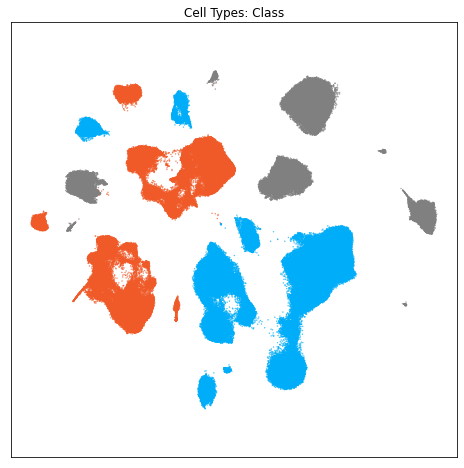

In [19]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['class_color'])
res = ax.set_title("Cell Types: Class")

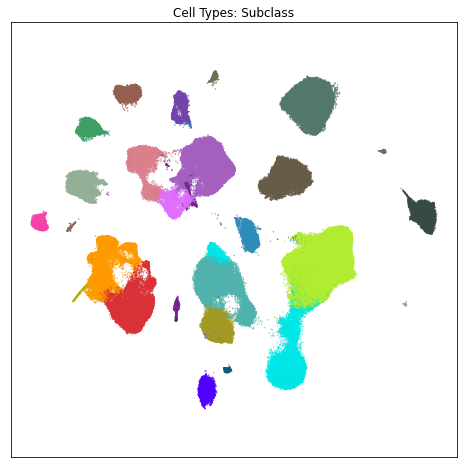

In [20]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['subclass_color'])
res = ax.set_title("Cell Types: Subclass")

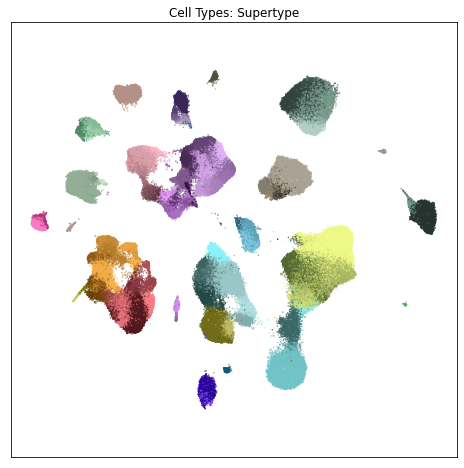

In [21]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['supertype_color'])
res = ax.set_title("Cell Types: Supertype")

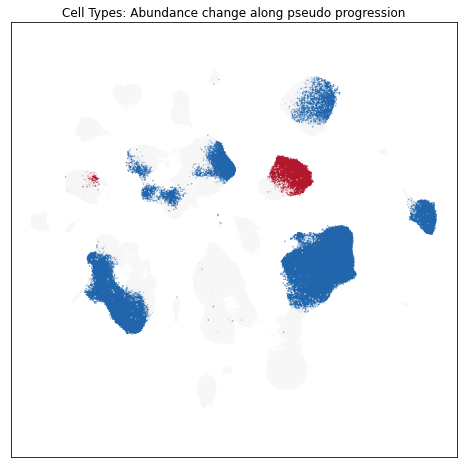

In [38]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['abundancechangecps_color'])
res = ax.set_title("Cell Types: Abundance change along pseudo progression")

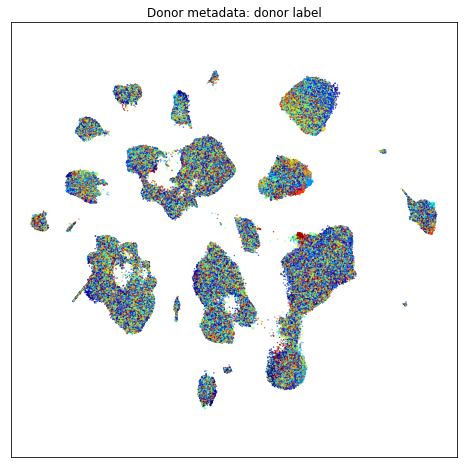

In [22]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['donor_label_color'])
res = ax.set_title("Donor metadata: donor label")

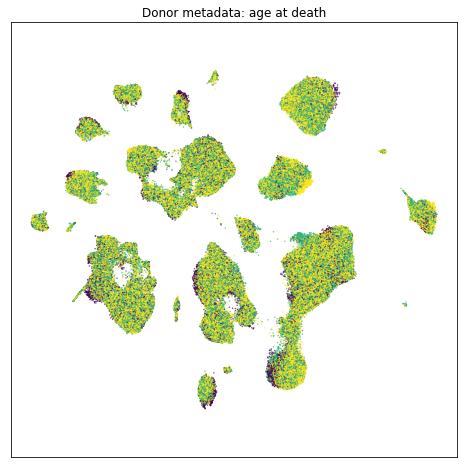

In [23]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['age_at_death_range_color'])
res = ax.set_title("Donor metadata: age at death")

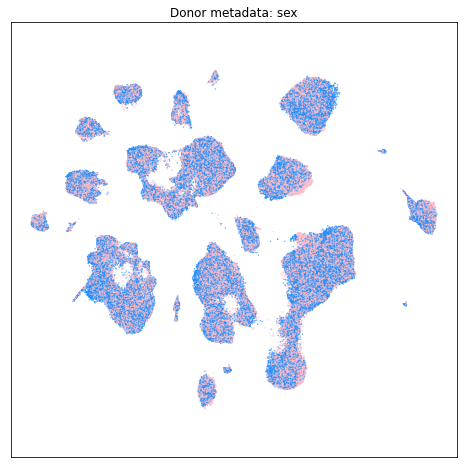

In [24]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['donor_sex_color'])
res = ax.set_title("Donor metadata: sex")

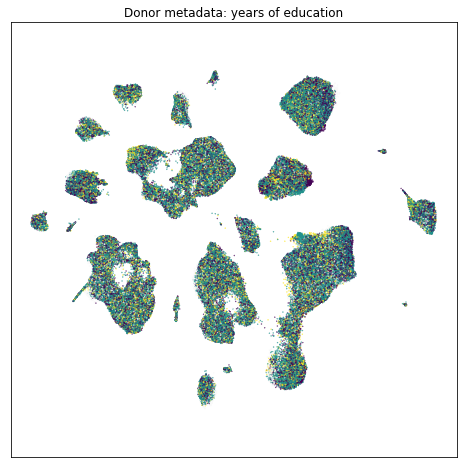

In [25]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['years_of_education_range_color'])
res = ax.set_title("Donor metadata: years of education")

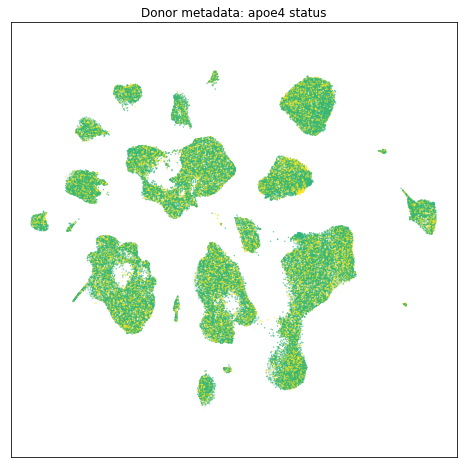

In [26]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['apoe4_status_color'])
res = ax.set_title("Donor metadata: apoe4 status")

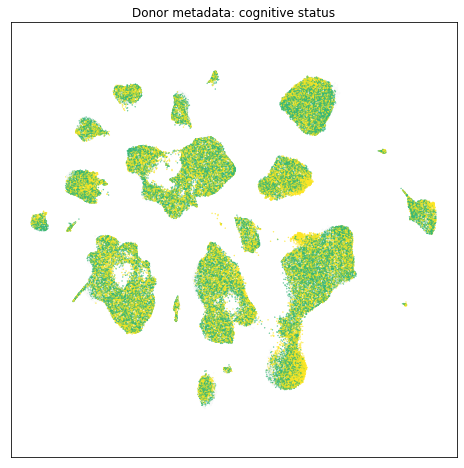

In [27]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['cognitive_status_color'])
res = ax.set_title("Donor metadata: cognitive status")

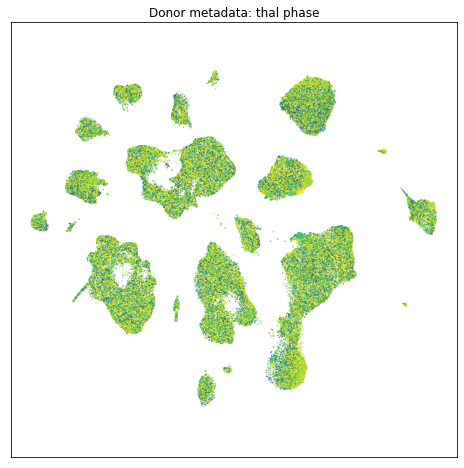

In [28]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['thal_phase_color'])
res = ax.set_title("Donor metadata: thal phase")

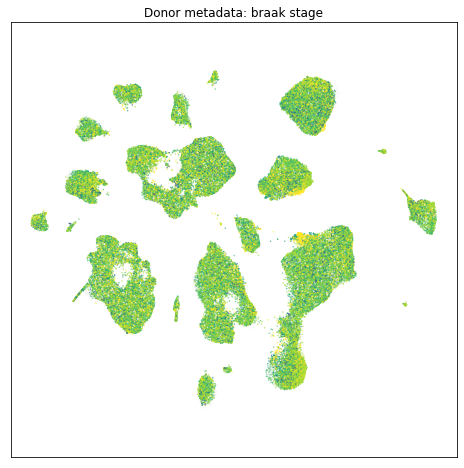

In [29]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['braak_stage_color'])
res = ax.set_title("Donor metadata: braak stage")

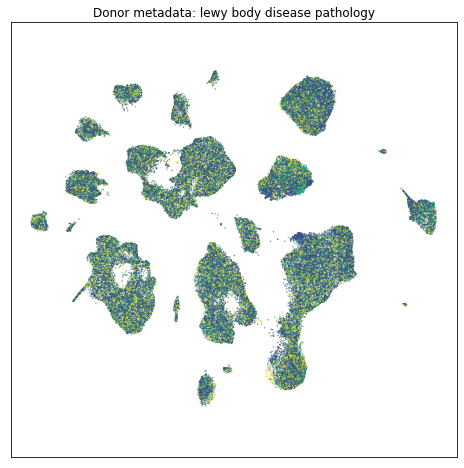

In [30]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['lewy_body_disease_pathology_color'])
res = ax.set_title("Donor metadata: lewy body disease pathology")

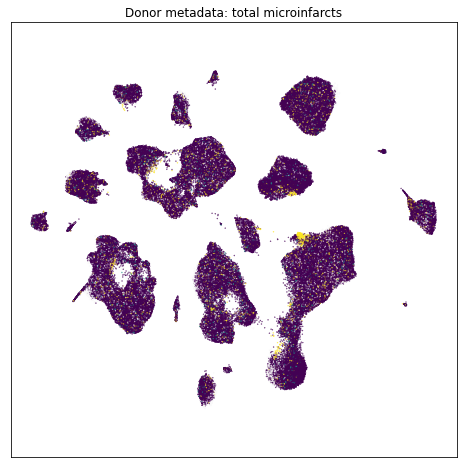

In [31]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['total_microinfarcts_range_color'])
res = ax.set_title("Donor metadata: total microinfarcts")

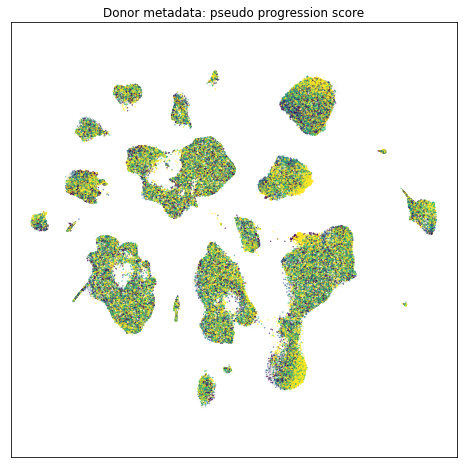

In [32]:
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['pseudo_progression_score_range_color'])
res = ax.set_title("Donor metadata: pseudo progression score")

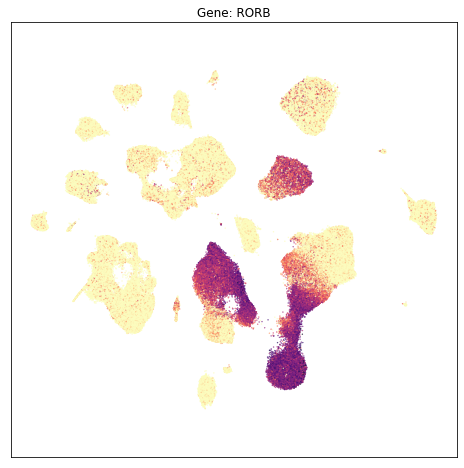

In [33]:
gsym = 'RORB'
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], val=cell_subsampled[gsym],cmap=plt.cm.magma_r)
res = ax.set_title("Gene: %s" % gsym)

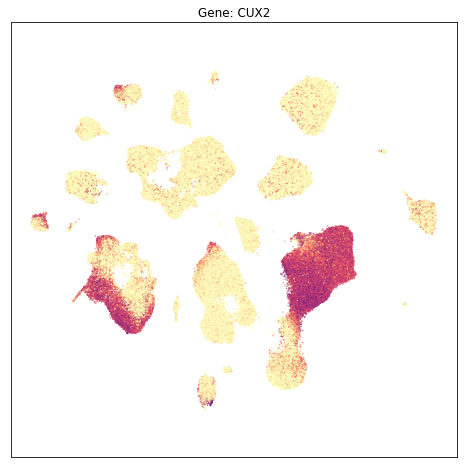

In [34]:
gsym = 'CUX2'
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], val=cell_subsampled[gsym],cmap=plt.cm.magma_r)
res = ax.set_title("Gene: %s" % gsym)

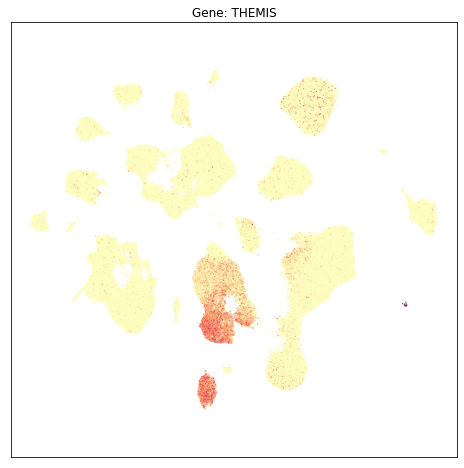

In [35]:
gsym = 'THEMIS'
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], val=cell_subsampled[gsym],cmap=plt.cm.magma_r)
res = ax.set_title("Gene: %s" % gsym)

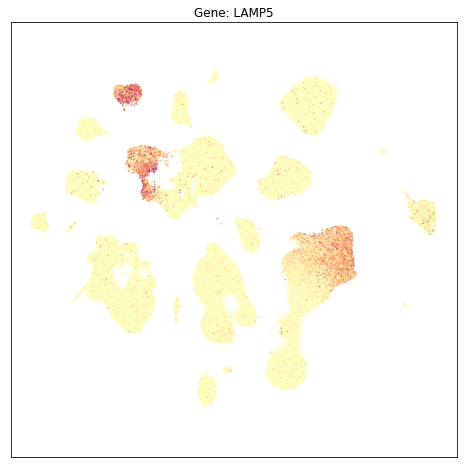

In [36]:
gsym = 'LAMP5'
fig, ax = plot_umap( cell_subsampled['x'], cell_subsampled['y'], val=cell_subsampled[gsym],cmap=plt.cm.magma_r)
res = ax.set_title("Gene: %s" % gsym)

In [37]:
rpath = metadata['gene']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
gene = pd.read_csv(file)
gene.set_index('gene_identifier',inplace=True)
print("Number of genes = ", len(gene))
gene.head(5)

Number of genes =  36601


,gene_symbol
gene_identifier,
ENSG00000243485,MIR1302-2HG
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000238009,AL627309.1
ENSG00000239945,AL627309.3
